### Neural Networks (Deep Learning)
#### The Neural Network Model

In [2]:
%matplotlib inline
import sys 
sys.path.append('..')
from preamble import *

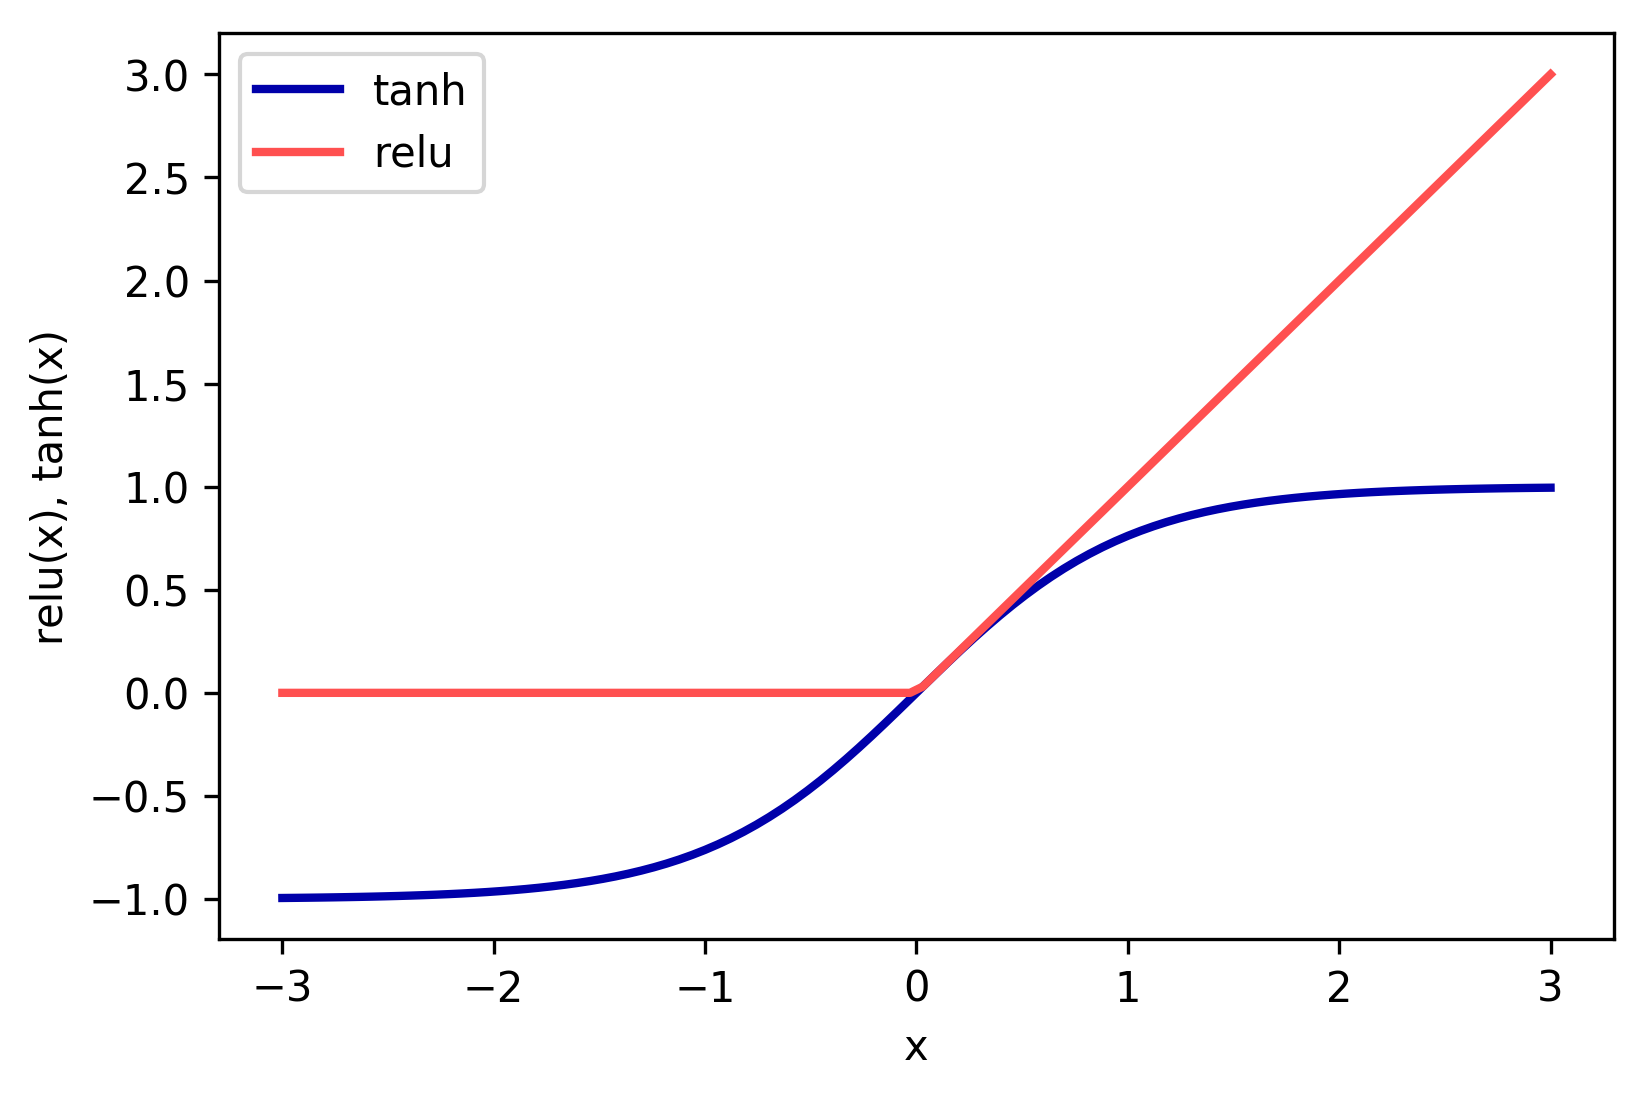

In [4]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

#### Tuning Neural Networks
- MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10], activation='tanh')
  - hidden_layer_sizes 매개변수가 없을 때 기본적인 신경망 구조
    - hidden layer 1개
    - hidden unit 개수: 100개
  - activation
    - 기본값: relu
    - tanh
  - solver (=optimizer)
    - 기본값: adam
      - 데이터의 스케일에 민감 --> 정규화 (평균 0, 분산 1) 중요
    - lbfgs
      - 대부분의 경우 안정적
      - 대량의 데이터에 대한 많은 연산 필요
    - sgd
      - momentum 및 nesterov_momentum 매개변수 지정 필요
      - momentum
        - 새롭게 계산된 그레디언트에 대해 momentum 매개변수에 지정된 비율만큼만 반영 --> 관성 적용
      - nesterov_momentum
        - momentum 방식으로 구한 그레디언트를 이전 그레디언트로 가정
        - 한번 더 momentum 방식을 적용하여 새로운 그레디언트 계산

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

NameError: name 'train_test_split' is not defined